# **Global Air Pollution Analysis Through Causal Inference**

# **Abstract**

This Notebook revolves around the comprehensive analysis and modeling of a global air pollution dataset, focusing on the quantification and exploration of air quality indices (AQIs) across numerous locations worldwide. Utilizing a rich dataset, the study investigates the distribution and impact of various pollutants, including carbon monoxide (CO), ozone, nitrogen dioxide (NO2), and fine particulate matter (PM2.5), on air quality. By employing statistical and machine learning techniques, including correlation analysis, linear regression, and causal inference models (LiNGAM), the project aims to uncover the intricate relationships between different pollutants and their collective impact on air quality. The integration of causal modeling further enriches the analysis by identifying potential causal pathways among pollutants, enhancing the understanding of air pollution dynamics.


# **What is Causality?**

Causality is a concept that lies at the heart of much scientific inquiry, providing a foundation for understanding the world around us. It describes the relationship between causes and their effects, enabling us to explain why things happen and to predict the outcomes of various actions and events. This section explores the nature of causality, its importance in various fields, and the approaches used to study causal relationships.

## Definition

Causality refers to the connection between an event (the cause) and a second event (the effect), where the second event is understood to be a consequence of the first. In simpler terms, causality shows us how and why certain outcomes follow from specific actions or conditions.

## Importance in Different Fields

- **Philosophy**: Philosophers study causality to understand the fundamental principles that govern the relationships between different events and states of affairs. This includes debating theories like the regularity theory, counterfactual theory, and interventionist approaches to causality.
  
- **Science and Mathematics**: In these fields, causality is crucial for building models that predict how systems behave. Deterministic causality refers to situations where a cause directly results in an effect. In contrast, probabilistic causality deals with causes that increase the likelihood of an effect without guaranteeing it.
  
- **Social Sciences and Medicine**: Understanding causal relationships enables researchers to identify the factors that contribute to social phenomena and health outcomes. This is vital for developing effective interventions and policies.

## Approaches to Studying Causality

1. **Experimental Approach**: Involves manipulating one variable to determine if changes in this variable cause changes in another. This method is widely used in the natural sciences to establish causality.

2. **Statistical and Probabilistic Models**: These models are used when it's not possible to conduct controlled experiments. They help in identifying patterns that suggest causal relationships, though they may not conclusively prove causality without further evidence.

3. **Counterfactual Reasoning**: This approach involves considering what would have happened in the absence of the potential cause. It's particularly useful in fields like economics and epidemiology.

4. **Causal Diagrams**: These diagrams, such as directed acyclic graphs (DAGs), help researchers visualize and identify potential causal relationships between variables.



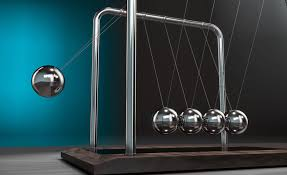

In [170]:
from IPython.display import Image
image_path = 'sample_data/images.jpeg'
width = 800
height = 600
Image(filename=image_path, width=width, height=height)



## Causes

- **Emissions from Industrial Activities and Fossil Fuel Combustion:** Primary sources of NO2 and CO emissions, significantly contributing to air pollution levels.
- **Vehicle Emissions:** Major contributor to CO, NO2, and PM2.5 levels, especially in urban areas.
- **Agricultural Activities:** Contribute to ozone and particulate matter through the use of fertilizers and pesticides.
- **Natural Sources:** Such as wildfires and dust storms, which contribute to spikes in PM2.5 levels.

## Effects

- **Health Impacts:** High pollutant levels can lead to respiratory and cardiovascular diseases, exacerbate asthma, and even cause premature death.
- **Environmental Damage:** Air pollution can harm wildlife, damage forests, and affect bodies of water, contributing to broader ecological imbalances.
- **Climate Change:** Certain pollutants, like ozone, have greenhouse gas effects contributing to global warming.

## Expected Outcomes

- **Enhanced Understanding of Air Pollution Dynamics:** Through causal inference and regression analysis, the project aims to highlight the complex interplay between pollutants and their collective impact on air quality.
- **Identification of Key Pollutants:** By analyzing relationships between AQIs and categories, the study aims to identify the most detrimental pollutants for targeted mitigation efforts.
- **Informing Policy and Mitigation Strategies:** Insights could shape air quality management policies, focusing on reducing emissions from key sources identified in the analysis.
- **Public Health Benefits:** Targeted pollution control measures could contribute to improved air quality, reducing the public health burden associated with air pollution.


# **Global Air Pollution Dataset**


## Context
Air pollution is a significant environmental and public health concern, caused by various pollutants emitted from natural and anthropogenic sources. This dataset provides geolocated information on four major pollutants:

- **Nitrogen Dioxide [NO2]:** NO2 is primarily emitted from vehicles, power plants, and industrial activities. Short-term exposure can exacerbate respiratory diseases, while prolonged exposure may lead to the development of asthma and respiratory infections, posing a higher risk to vulnerable groups such as individuals with asthma, children, and the elderly.

- **Ozone [O3]:** Ground-level ozone is formed by chemical reactions between nitrogen oxides and volatile organic compounds. It can cause chest pain, coughing, throat irritation, and airway inflammation. Ozone also affects lung function and can worsen respiratory conditions like bronchitis, emphysema, and asthma. Additionally, it damages vegetation and ecosystems, particularly sensitive vegetation during the growing season.

- **Carbon Monoxide [CO]:** CO is emitted primarily by vehicles and machinery burning fossil fuels. Exposure to high levels of CO reduces the oxygen-carrying capacity of the blood, leading to dizziness, confusion, unconsciousness, and even death. While outdoor exposure to high levels of CO is less likely, enclosed environments with combustion sources can pose significant risks to human health.

- **Particulate Matter [PM2.5]:** PM2.5 refers to fine particles with a diameter of 2.5 micrometers or less, emitted from various sources such as vehicle exhaust, industrial processes, and wildfires. These particles can penetrate deep into the lungs and cause serious heart and lung problems, contributing to cardiovascular and respiratory diseases. Classified as a Group 1 carcinogen by the International Agency for Research on Cancer (IARC), PM2.5 poses significant health risks to exposed populations.


## Content
- **Country:** Name of the country where the data was collected.
- **City:** Name of the city where the air quality measurements were taken.
- **AQI Value:** Overall Air Quality Index (AQI) value of the city, representing the combined effect of various pollutants.
- **AQI Category:** Overall AQI category of the city, indicating the level of air pollution.
- **CO AQI Value:** AQI value of Carbon Monoxide for the city.
- **CO AQI Category:** AQI category of Carbon Monoxide for the city.
- **Ozone AQI Value:** AQI value of Ozone for the city.
- **Ozone AQI Category:** AQI category of Ozone for the city.
- **NO2 AQI Value:** AQI value of Nitrogen Dioxide for the city.
- **NO2 AQI Category:** AQI category of Nitrogen Dioxide for the city.
- **PM2.5 AQI Value:** AQI value of Particulate Matter (PM2.5) for the city.
- **PM2.5 AQI Category:** AQI category of Particulate Matter (PM2.5) for the city.

## Importance
This dataset facilitates the analysis of air quality across different regions, aiding in identifying areas with high pollution levels and understanding the factors contributing to poor air quality. By examining trends and correlations in air pollutant levels, researchers and policymakers can develop effective strategies to mitigate the adverse effects of air pollution on public health and the environment.


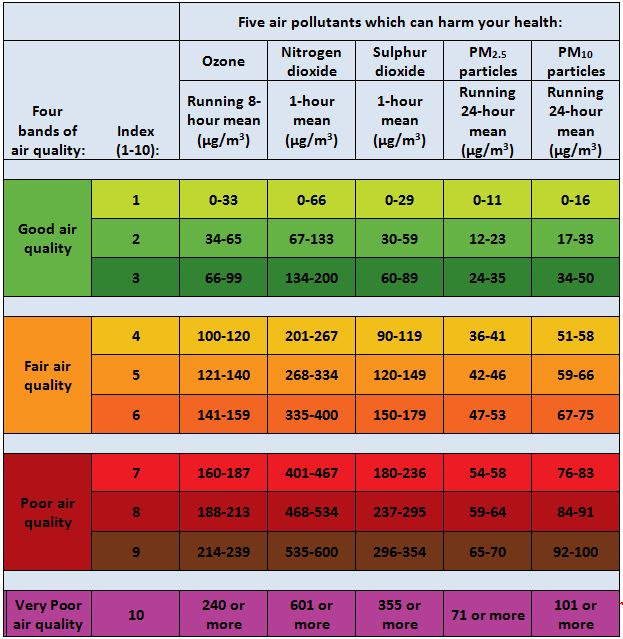

In [171]:
from IPython.display import Image
image_path = '/content/sample_data/AQIHPollutantTable--we.jpeg'
width = 800
height = 600
Image(filename=image_path, width=width, height=height)


## Installing libraries

In [172]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## **Reading the Global Air Pollution Dataset**

In [173]:
df=pd.read_csv('https://raw.githubusercontent.com/Selvintuscano31/INFO7390/main/global%20air%20pollution%20dataset.csv')


In [174]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


# **Checking for Missing Values**

In [176]:
df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [177]:
df.dropna(inplace=True)

In [178]:
df.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

In [179]:
df['Country'].nunique()

175

In [180]:
df['City'].nunique()

23035

In [181]:
df[df['City']=='Boston']

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
23002,United States of America,Boston,44,Good,1,Good,40,Good,1,Good,44,Good


# **Exploratory Data Analysis**

**Visualizing Distribution of Selected Columns:**


The code snippet provided aims to visualize the distribution of air quality indices (AQI) for various pollutants, including Carbon Monoxide (CO), Ozone (O3), Nitrogen Dioxide (NO2), and Particulate Matter 2.5 (PM2.5), using histograms.


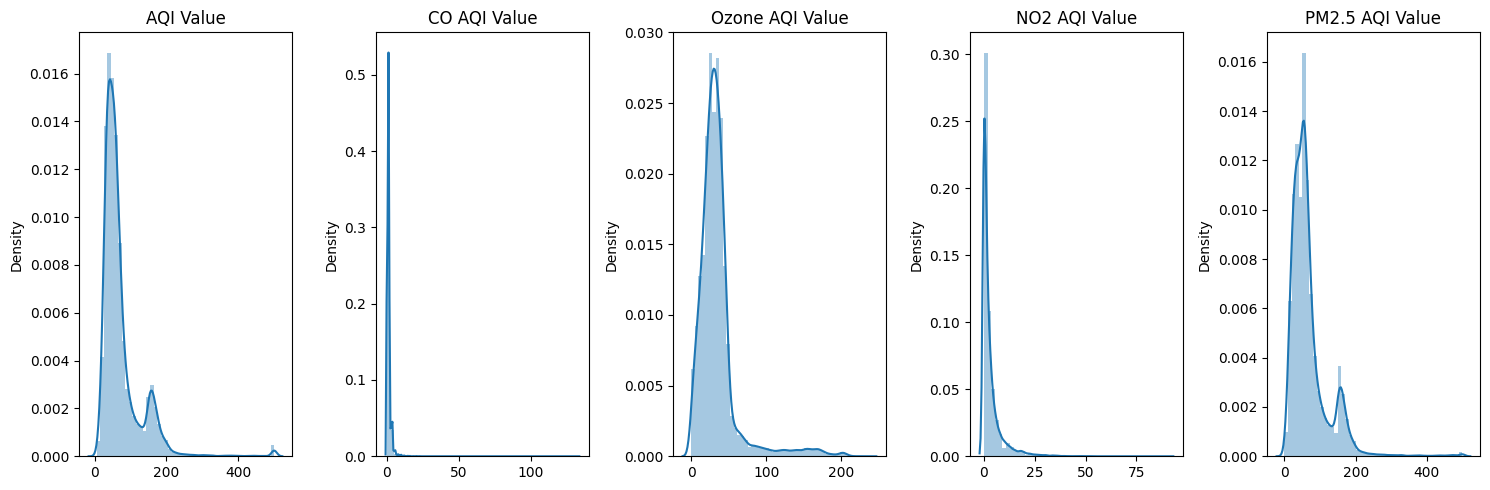

In [182]:
col=[ 'AQI Value', 'CO AQI Value',
       'Ozone AQI Value','NO2 AQI Value', 'PM2.5 AQI Value']
fig = plt.figure(figsize=(15,5))

for i in range(len(col)):
    plt.subplot(1,5,i+1)
    plt.title(col[i])
    sns.distplot(df,x=df[col[i]])
plt.tight_layout()
plt.show()

## Observations

### AQI Value:
- The distribution is right-skewed, with most AQI values concentrated towards the lower end, indicating good to moderate air quality in many cities.
- A small peak around the value of 50 suggests a common upper limit for the "Good" AQI category.
- Instances of extremely high AQI values are rare.

### CO AQI Value:
- The histogram for Carbon Monoxide (CO) AQI values shows an extremely high peak at the lower end, indicating that the majority of observed locations have very low CO AQI values, typically indicating good air quality regarding CO levels.
- There are negligible counts as the CO AQI Value increases, suggesting that high CO pollution levels are rare in the dataset.

### Ozone AQI Value:
- The distribution is right-skewed, similar to the general AQI trend, with most values being low, indicating that high ozone levels are not common.
- There's a more gradual decrease in frequency as ozone AQI values increase compared to CO AQI values.

### NO2 AQI Value:
- Nitrogen dioxide (NO2) AQI values are also right-skewed but with a flatter curve compared to CO, indicating a wider distribution of NO2 levels across different areas.
- Most data is still concentrated at the lower end, but there's a more noticeable spread across mid-range values.

### PM2.5 AQI Value:
- Fine particulate matter (PM2.5) AQI values display a right-skewed distribution, similar to the overall AQI trend, with most data points gathered towards the lower end.
- There's a notable peak at the lower end, with a sharp decline as values increase, indicating that higher PM2.5 levels are less common.

### Overall Observation:
- Across all histograms, there are long tails towards higher values, suggesting the presence of outliers or extreme pollution events.
- While most places have good to moderate air quality in terms of the pollutants measured, some areas exhibit poor air quality, as indicated by higher AQI values for CO, ozone, NO2, and PM2.5.


In [183]:
df['AQI Value'].value_counts()

50     472
35     464
34     440
39     427
54     420
      ... 
256      1
405      1
236      1
376      1
253      1
Name: AQI Value, Length: 347, dtype: int64

**The Air Quality Index (AQI)** provides a standardized way to communicate the quality of the air in terms of various pollutants. Different countries have their own AQI scales and thresholds for defining air quality categories. However, in general, AQI values can be categorized as follows:

- **Good (0-50):** Air quality is satisfactory, and air pollution poses little or no risk.
- **Moderate (51-100):** Air quality is acceptable; however, some pollutants may pose a risk to a small number of people who are sensitive to air pollution.
- **Unhealthy for Sensitive Groups (101-150):** The air quality may pose health risks, particularly to sensitive groups such as children, the elderly, and individuals with respiratory or heart conditions.
- **Unhealthy (151-200):** The air quality is considered unhealthy, and everyone may experience adverse health effects. People with respiratory or heart conditions, as well as children and the elderly, are at a greater risk.
- **Very Unhealthy (201-300):** Health warnings of emergency conditions. The entire population may be affected, and serious health effects may occur.
- **Hazardous (301 and above):** Health alert: everyone may experience more serious health effects.

Therefore, AQI values above 150 are generally considered dangerous, as they fall within the "Unhealthy" category. However, the exact threshold for when air quality becomes dangerous can vary depending on the specific pollutants being measured and the sensitivity of the population. It's important to consult local environmental agencies or health organizations for specific guidelines and recommendations related to air quality in a particular area.


In [184]:
high_aqi_values = df.loc[df['AQI Value'] > 150]
high_aqi_values

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
12,India,Radaur,158,Unhealthy,3,Good,139,Unhealthy for Sensitive Groups,1,Good,158,Unhealthy
13,Pakistan,Radhan,158,Unhealthy,1,Good,50,Good,1,Good,158,Unhealthy
16,India,Rajgir,154,Unhealthy,3,Good,100,Unhealthy for Sensitive Groups,2,Good,154,Unhealthy
19,India,Phulabani,161,Unhealthy,2,Good,71,Moderate,0,Good,161,Unhealthy
24,Brazil,Pinheiral,154,Unhealthy,5,Good,0,Good,13,Good,154,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...
23409,India,Ghatanji,156,Unhealthy,2,Good,36,Good,2,Good,156,Unhealthy
23414,Yemen,Lahij,152,Unhealthy,1,Good,44,Good,1,Good,152,Unhealthy
23429,Mexico,Tlaltelulco,181,Unhealthy,3,Good,2,Good,11,Good,181,Unhealthy
23455,China,Shaoguan,160,Unhealthy,3,Good,160,Unhealthy,1,Good,79,Moderate


**Over 2500 cities have a AQI above 150**

## **Visualizing AQI Categories:**

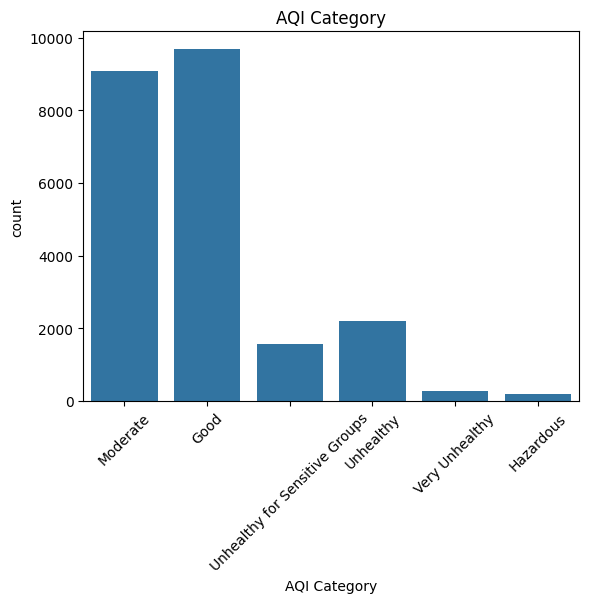

In [185]:
sns.countplot(data=df, x='AQI Category')
plt.title('AQI Category')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()



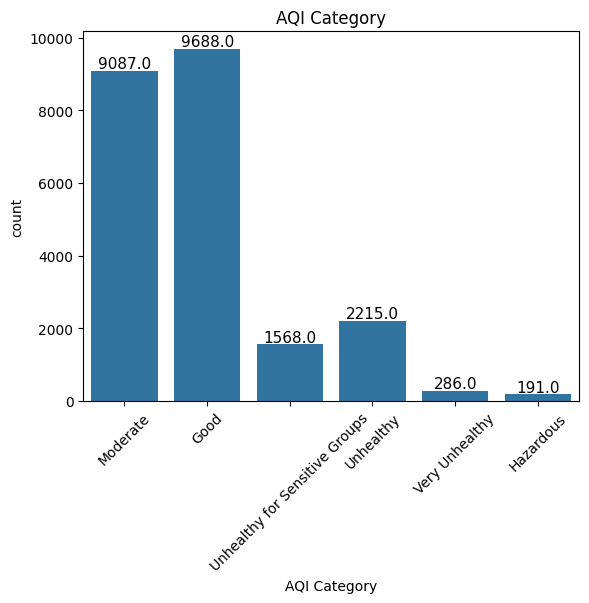

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create countplot
sns.countplot(data=df, x='AQI Category')

# Add title
plt.title('AQI Category')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add count labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Show plot
plt.show()


## Analysis of AQI Categories

### Most Common Categories:
- The 'Good' and 'Moderate' AQI categories dominate the dataset, indicating that air quality is generally acceptable or poses little risk.

### 'Good' Category Dominance:
- 'Good' category has the highest count (9,688), indicating satisfactory air quality with minimal pollution risk.

### Moderate Category:
- 'Moderate' category follows closely with 9,087 observations, suggesting acceptable air quality with moderate health concerns.

### Sensitive Groups:
- 'Unhealthy for Sensitive Groups' category has a significant count (1,568), indicating health risks for sensitive individuals.

### Less Common Categories:
- 'Unhealthy', 'Very Unhealthy', and 'Hazardous' categories have lower counts, indicating less frequent instances of dangerous air quality.

### Public Health Implications:
- Occurrences of 'Unhealthy', 'Very Unhealthy', and 'Hazardous' categories suggest potential health risks for the entire population.

### Overall Air Quality:
- The dataset primarily includes observations with good to moderate air quality, with fewer instances of poor air quality posing serious health risks.


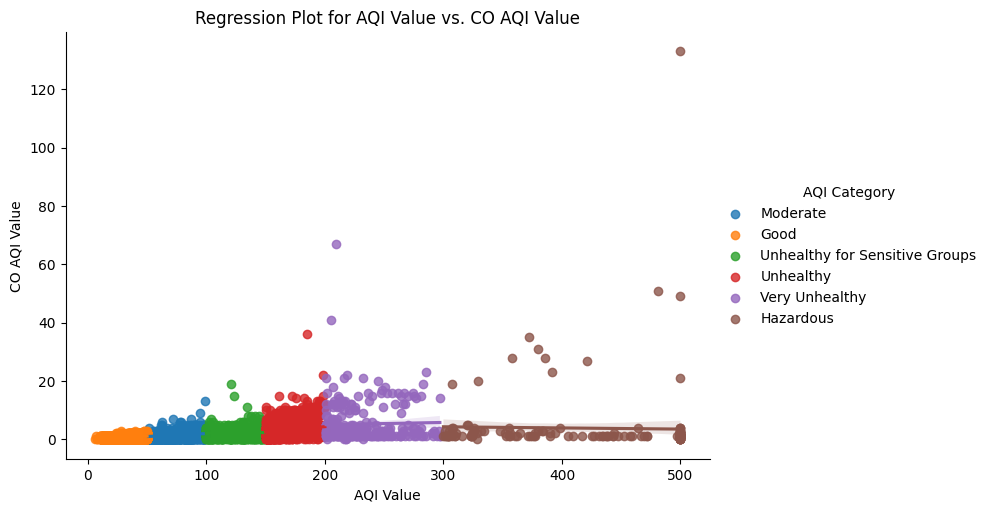

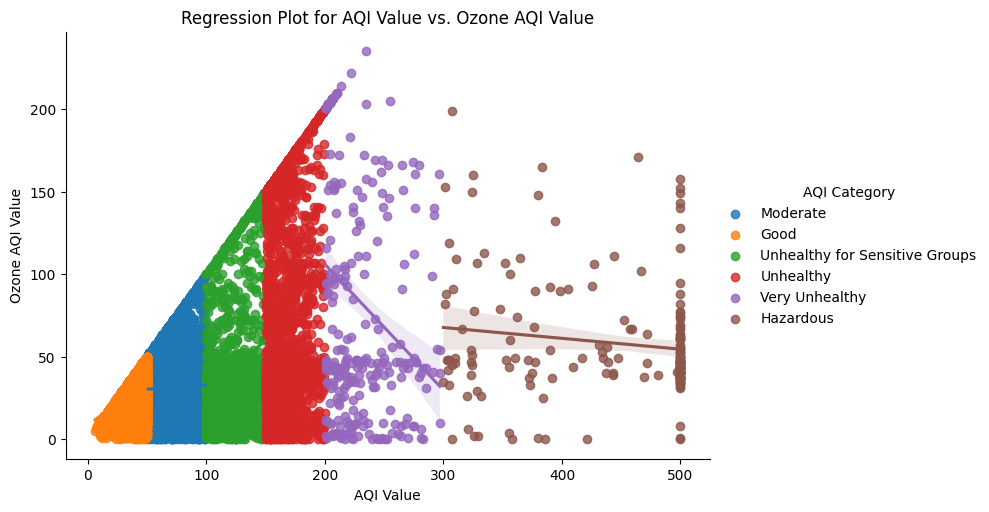

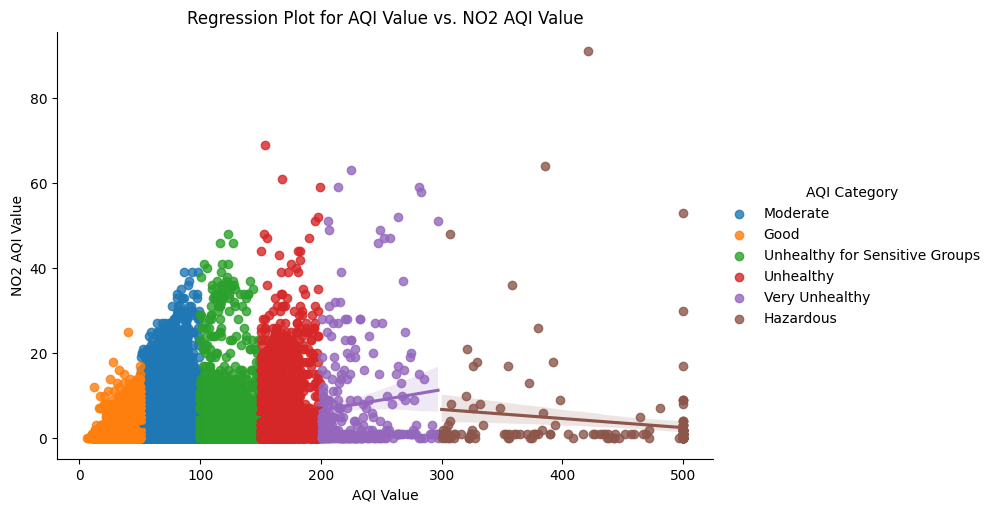

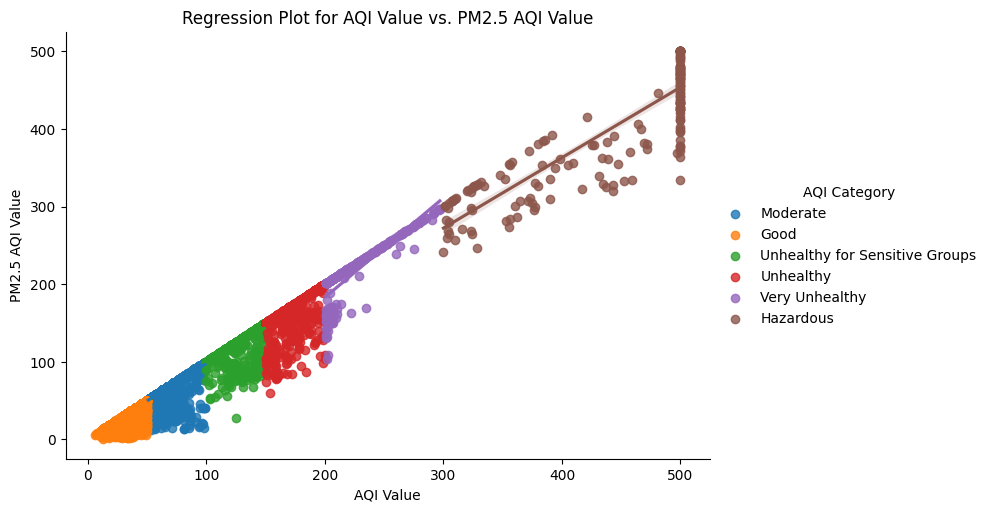

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'col' with the actual list of column names you want to iterate over.
# For example, if your DataFrame df has columns 'CO AQI Value', 'Ozone AQI Value', etc.,
# you can create a list as follows:

col = [column for column in df.columns if 'AQI Value' in column and column != 'AQI Value']

# Now, generate the scatter plots with regression lines
for column in col:
    # No need to check if column != 'AQI Value' since we've already filtered these out
    sns.lmplot(data=df, x='AQI Value', y=column, hue='AQI Category', aspect=1.5)
    plt.title(f'Regression Plot for AQI Value vs. {column}')
    plt.show()


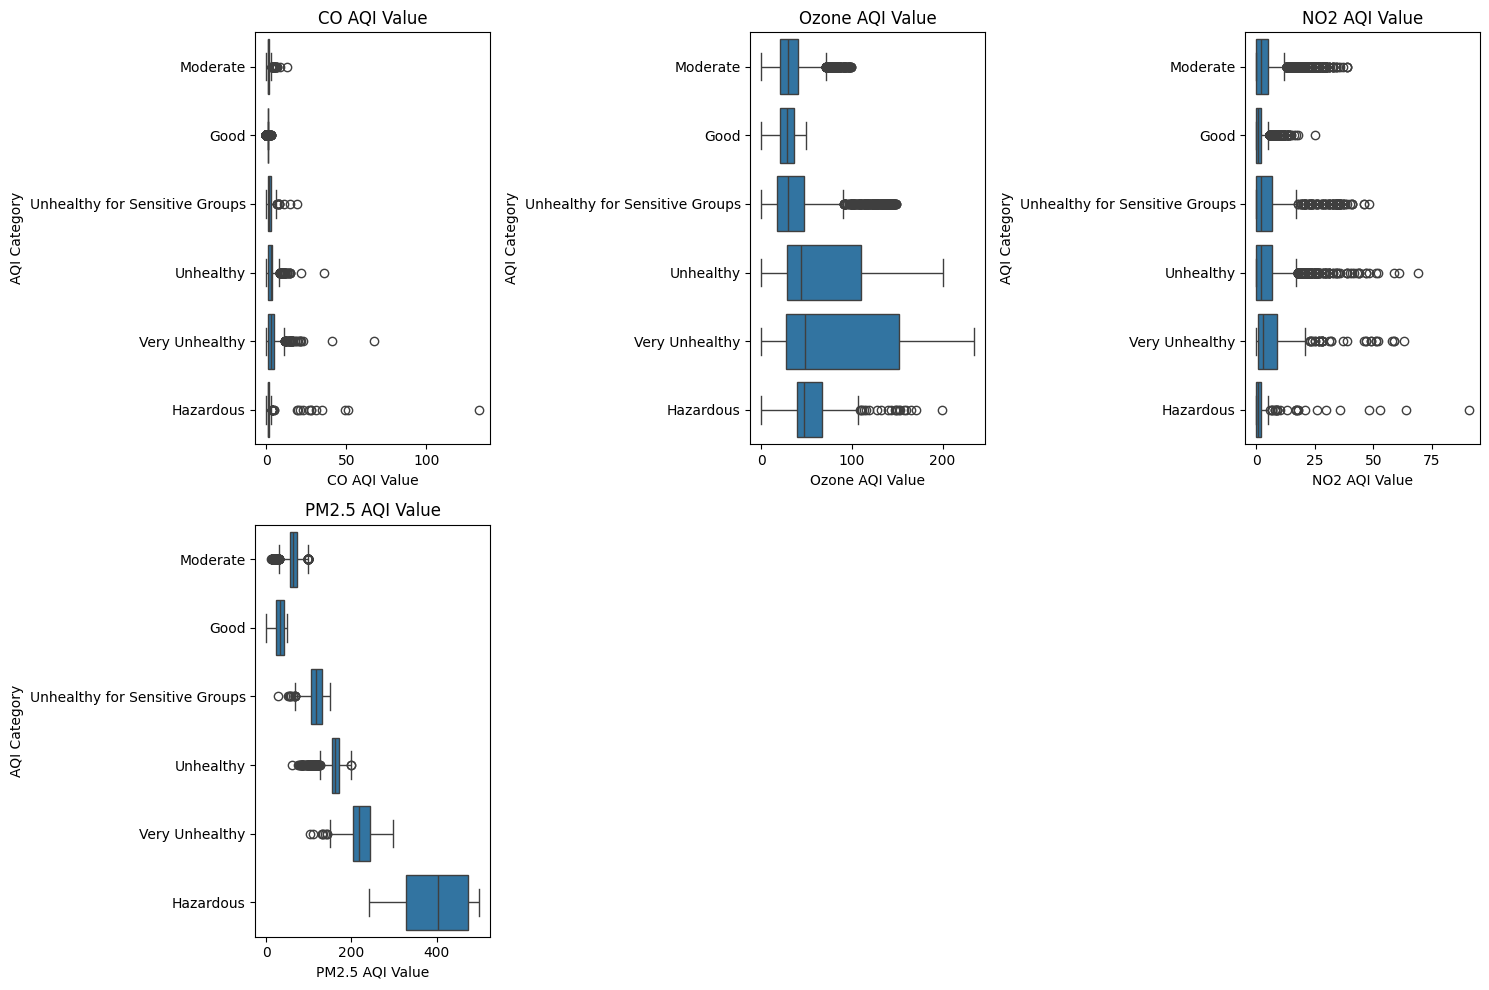

In [188]:
fig = plt.figure(figsize=(15,10))

for i in range(len(col)):
    plt.subplot(2,3,i+1)
    plt.title(col[i])
    sns.boxplot(data=df,x=df[col[i]],y=df['AQI Category'])
plt.tight_layout()
plt.show()


## AQI and Pollutant Distribution Observations

### AQI Value:
- Box plot likely shows varying measurements across AQI categories, with higher severity categories having increased median and spread.

### CO AQI Value:
- Shows less significant increase across AQI categories compared to overall AQI, suggesting it contributes but isn't the sole driver of poor air quality.

### NO2 AQI Value:
- Wide variance in higher AQI categories, with outliers indicating occasional extreme pollution events.

### Ozone AQI Value:
- Trends upwards with worse AQI categories, but with broad distribution and sporadic high ozone levels indicated by outliers.

### PM2.5 AQI Value:
- Strong correlation with higher AQI categories, showing higher median values and larger interquartile ranges in severe categories.

### Consistency Across Categories:
- Some pollutants may have consistent median values across categories but differ in spread, indicating their influence on overall AQI.

### Influence of Individual Pollutants:
- Spread and shift in median of box plots reflect their contribution to overall AQI.

### Comparative Analysis:
- Comparing range and median helps identify pollutants likely to reach hazardous levels.


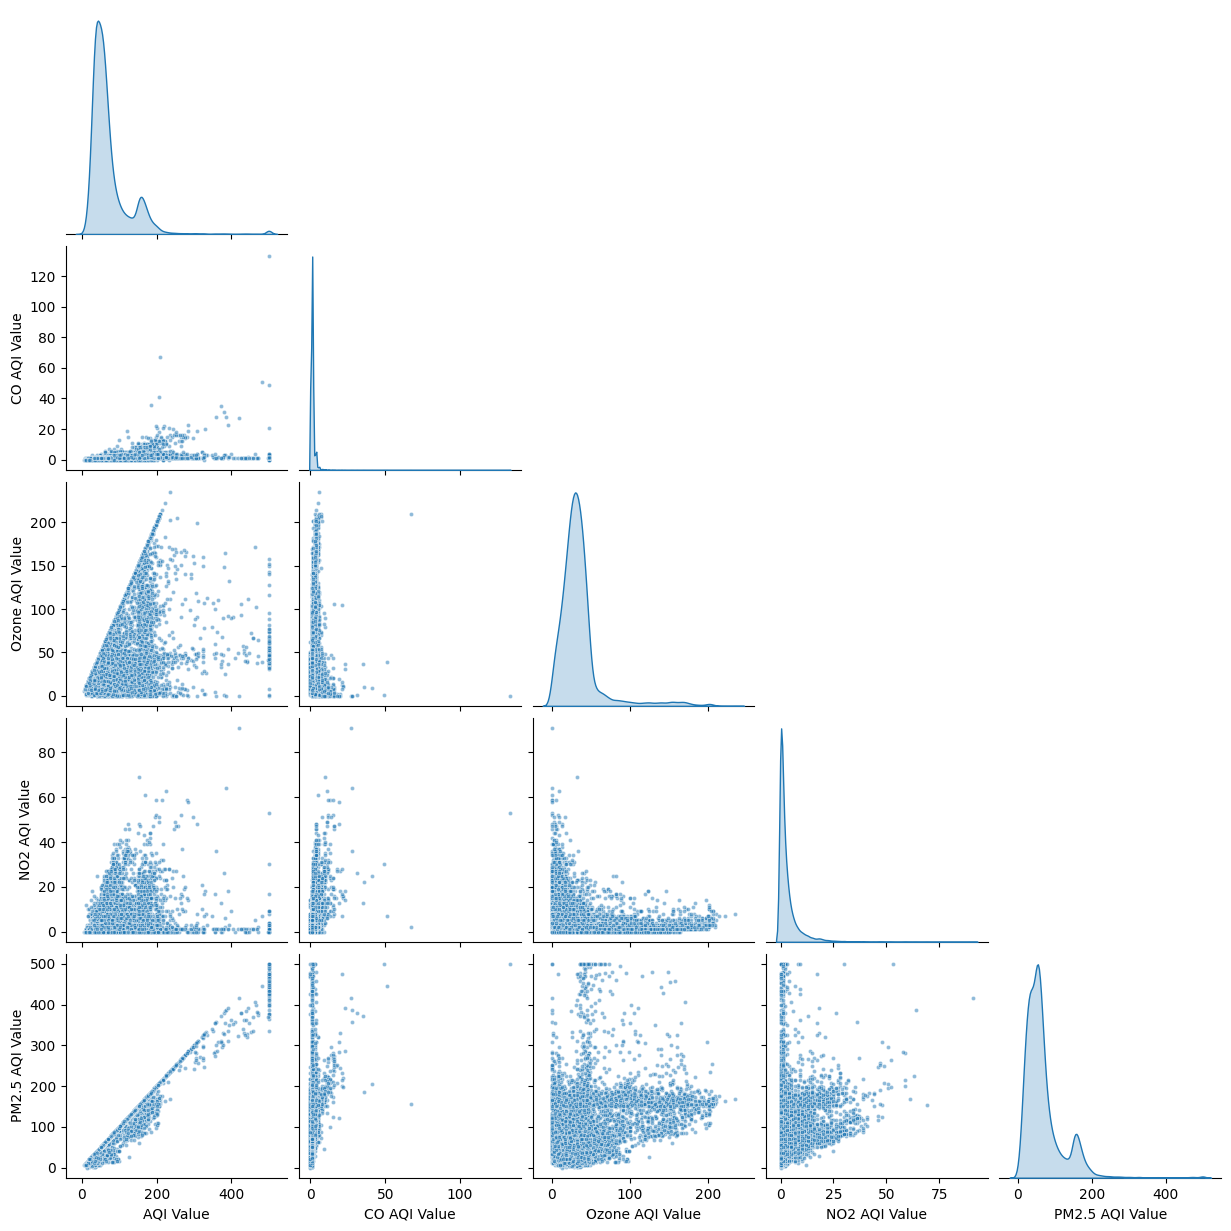

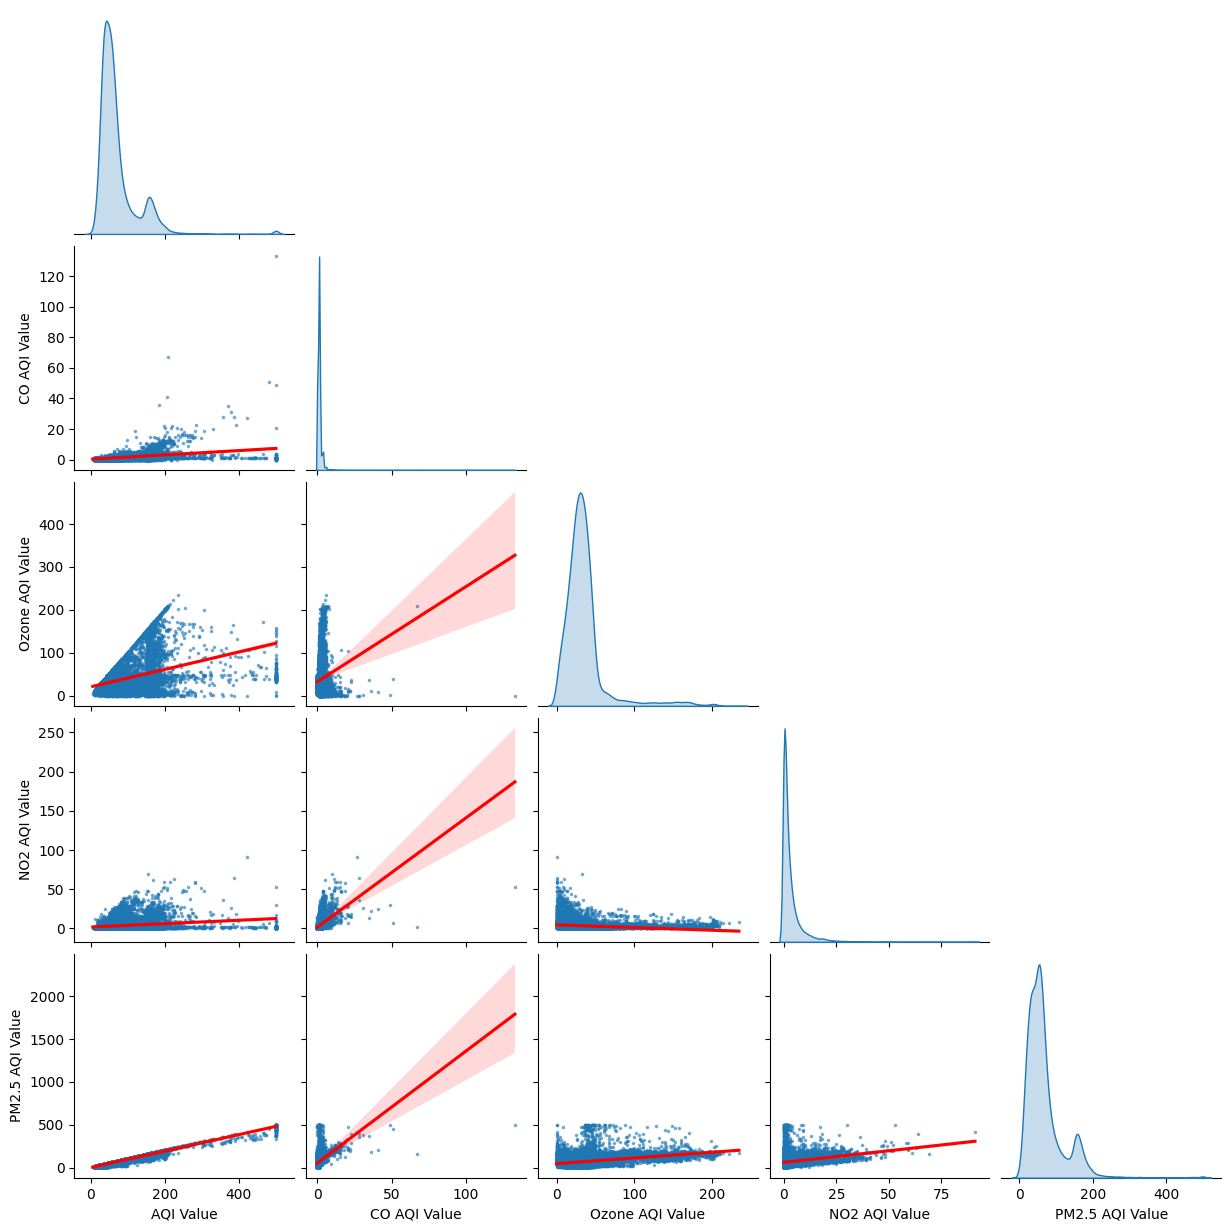

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette
custom_palette = sns.color_palette("viridis", as_cmap=True)

# Create pairplot with customized settings
sns.pairplot(df, diag_kind='kde', corner=True, palette=custom_palette, markers='.', plot_kws={'alpha': 0.5})

# Add regression lines and scatter plot markers
sns.pairplot(df, kind='reg', diag_kind='kde', corner=True, palette=custom_palette, markers='.', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'s': 10, 'alpha': 0.5}})

# Show the plot
plt.show()


# **Observations**

## Histogram Distributions

The histograms along the diagonal show the distribution of individual AQIs. Most distributions appear to be right-skewed, indicating a higher concentration of lower AQI values with fewer high AQI values. This is a common distribution in environmental data where extreme pollution events are less frequent.

## CO AQI and Other Pollutants

The scatter plots between CO AQI and other AQIs show a positive correlation, as evidenced by the general upward trend in the scatter plots. The relationship suggests that as the CO AQI increases, the levels of Ozone, NO2, and PM2.5 AQIs also tend to increase. There is a broad spread of data points, indicating variability and possibly other contributing factors that influence AQI values apart from CO levels.

## Ozone AQI Relationships

The scatter plot of Ozone AQI versus CO AQI shows a less clear relationship, with a dense cluster at the lower end of the AQI values. For Ozone AQI with NO2 and PM2.5 AQIs, the data points suggest a possible positive correlation, but it's less strong compared to the CO AQI relationships.

## NO2 and PM2.5 AQI Correlation

The scatter plot between NO2 AQI and PM2.5 AQI indicates a positive correlation with many data points lying close to the trend line, suggesting that as NO2 AQI levels increase, PM2.5 AQI levels tend to increase as well.

## PM2.5 AQI and Other Pollutants

When PM2.5 AQI values are plotted against other pollutants, there is a visible positive trend, indicating that higher PM2.5 levels often coincide with higher levels of CO, Ozone, and NO2.

## Data Density

The scatter plots also show areas of higher data point density, mostly near the lower AQI values, indicating more frequent occurrences of lower pollution levels.


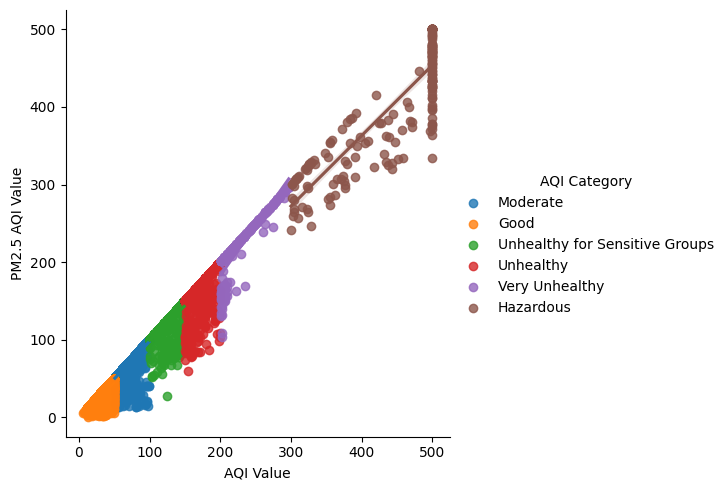

In [190]:
sns.lmplot(data=df,y='PM2.5 AQI Value',x='AQI Value',hue="AQI Category");


**Strong Positive Correlation:**

There appears to be a strong positive correlation between PM2.5 AQI Values and overall AQI Values, indicated by the trend of the data points. As the PM2.5 AQI Value increases, the overall AQI Value also increases.

**Positive Relationship:**

There's a positive trend between CO AQI Values and NO2 AQI Values, indicating that as the concentration of carbon monoxide increases, nitrogen dioxide levels tend to increase as well.

# **Directed Acyclic Graph**

DAG stands for Directed Acyclic Graph in the context of causal inference. It's a graphical representation used to model causal relationships between variables. Here's what each part of the term means:

**Directed**: The edges (arrows) in the graph indicate a direction of influence or causality. For example, if there's an arrow from variable A to variable B, it suggests that changes in variable A directly influence variable B.

**Acyclic**: The graph is acyclic, meaning there are no cycles or loops in the causal relationships. This ensures that causal relationships are well-defined and do not lead to circular dependencies.

DAGs are commonly used in causal inference to visually represent the causal structure of a system or dataset. They help researchers and analysts understand how variables interact with each other and identify potential causal pathways. In machine learning, DAGs are often used to guide the development of causal models and interpret the results of causal inference algorithms.

# **Lingam Framework for Causal Inference**

The term "lingam" stands for "latent variables' inference with a nonlinear, causal, and non-Gaussian model." It's a method used to identify causal relationships between variables in observational data when there may be hidden or latent variables influencing the observed variables.

The lingam approach assumes that there is a causal structure underlying the observed variables, which can be represented by a directed acyclic graph (DAG). In this framework, variables are represented as nodes in the graph, and causal relationships are represented by directed edges between nodes. The lingam method aims to infer this causal structure from the data, even when the relationships between variables are nonlinear or non-Gaussian.

## Lingam Framework Steps:

1. **Model Specification**: Specify a causal model representing the relationships between observed and latent variables.

2. **Estimation**: Estimate the parameters of the causal model from the observational data.

3. **Causal Inference**: Use the estimated model to infer causal relationships between variables, taking into account the presence of latent variables.

4. **Validation**: Validate the inferred causal relationships using various statistical tests and techniques.

Overall, lingam provides a powerful approach to causal inference in observational studies, particularly in cases where the relationships between variables are complex and nonlinear, and where there may be unobserved or latent variables influencing the data.


In [191]:
pip install lingam

In [192]:
pip install pygam

In [193]:
pip install factor_analyzer

# Why Use category_encoders

The `category_encoders` library is a Python package commonly used in machine learning and data analysis tasks, particularly when dealing with categorical variables. Here's why you might use category_encoders:

## Handling Categorical Data
- `category_encoders` provides various encoding techniques to convert categorical variables into numerical representations that machine learning algorithms can understand. This is crucial because many machine learning models require numerical input.

## Encoding Techniques
- **Ordinal Encoding**: Converts categorical labels to ordinal integers.
- **One-Hot Encoding**: Creates dummy variables for each category, representing them as binary features.
- **Target Encoding**: Encodes categories based on the mean of the target variable within each category.
- **Helmert Encoding**: Computes contrasts between each level of a categorical variable.
- **Binary Encoding**: Converts categories into binary code.
- and more.

## Compatibility and Ease of Use
- `category_encoders` is easy to install via pip and integrates well with popular Python libraries such as scikit-learn, pandas, and numpy. This makes it convenient to use within your existing data analysis and machine learning workflows.

## Flexibility
- The library provides flexibility in choosing the appropriate encoding technique based on the specific characteristics of your dataset and the requirements of your machine learning model.

## Handling High Cardinality
- For categorical variables with high cardinality (a large number of unique categories), `category_encoders` offers techniques like Hashing Encoder and Leave One Out Encoder, which can be more efficient and effective compared to traditional encoding methods.


In [194]:
pip install category_encoders


In [195]:
from IPython.display import Image  # Import the Image class from IPython.display module for displaying images
import category_encoders as ce  # Import the category_encoders library as ce for encoding categorical variables
import graphviz  # Import the graphviz library for visualizing graphs
import lingam  # Import the lingam library for causal inference
from lingam.utils import make_dot, make_prior_knowledge  # Import functions from lingam.utils module for creating visualizations and prior knowledge


the DataFrame df is being modified to create a new DataFrame df1 by dropping specific columns ("Country", "City", and various AQI categories) along with any rows containing missing values. This process is often employed to prepare data for analysis by removing unnecessary columns and ensuring data completeness

In [196]:
df1 = df.drop(["Country","City",'AQI Value',"AQI Category","CO AQI Category","Ozone AQI Category","NO2 AQI Category","PM2.5 AQI Category"], axis=1)

In [197]:
df1 = df1.dropna(how='any')

In [198]:
display(pd.DataFrame(df1.isnull().sum()).T)

,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,0,0,0,0


In [199]:
df_list = df1.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

4
{'CO AQI Value': 0, 'Ozone AQI Value': 1, 'NO2 AQI Value': 2, 'PM2.5 AQI Value': 3}



This code iterates over the columns of the DataFrame df1 and creates a dictionary df_dict where the keys are the column names, and the values are the corresponding indices of the columns. It prints the length of the list of column names (df_list) and the resulting dictionary df_dict.

Essentially, it assigns a unique index to each column name in the DataFrame df1. The resulting dictionary df_dict can be useful for referencing columns by their indices in subsequent operations.

The make_prior_knowledge function from the lingam.utils module is being used to create a prior knowledge matrix for causal inference. In this specific case:

The first argument 4 specifies the number of variables in the dataset.
The paths parameter is used to specify the known causal relationships between variables. In this case, it indicates that there is a causal path from the column representing "CO AQI Value" to the column representing "NO2 AQI Value" in the DataFrame df1. The causal path is represented as a list of indices, where df_dict['CO AQI Value'] and df_dict['NO2 AQI Value'] are the indices of the respective columns.
The resulting prior_knowledge matrix will encode this known causal relationship, which can be used as input for causal inference algorithms to guide the discovery of causal relationships in the data.

In [200]:

prior_knowledge = make_prior_knowledge(4,paths = [[df_dict['CO AQI Value'],df_dict['NO2 AQI Value']]])

In [201]:
model = lingam.DirectLiNGAM(
                    random_state=42,
                    measure = 'pwling',
                    prior_knowledge = prior_knowledge
                    )

model.fit(df1)

An instance of the DirectLiNGAM class from the lingam module is created and assigned to the variable model.

Various parameters are passed to the constructor:
random_state=42: Sets the random seed for reproducibility of results.
measure='pwling': Specifies the causality measure used during estimation. In this case, 'pwling' refers to pairwise LiNGAM, which is a method for estimating causal relationships between variables.

prior_knowledge=prior_knowledge: Provides the prior knowledge matrix generated earlier, which encodes known causal relationships between variables.

The fit method is called on the model instance, passing the DataFrame df1 as input. This fits the DirectLiNGAM model to the data, estimating causal relationships between variables while considering the provided prior knowledge.
Overall, this code segment fits a DirectLiNGAM model to the data, incorporating any prior knowledge of causal relationships specified by the prior_knowledge matrix. The resulting model can then be used to analyze causal dependencies among the variables in df1.

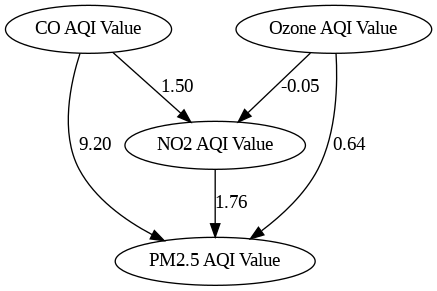

In [202]:
dot = make_dot(
    model.adjacency_matrix_,
     labels=df1.columns.to_list(),
    )


dot.format = 'png'
dot.render('dag')

Image("dag.png")

# **Observations**

**Nodes**: Each node (circle) represents an AQI variable, such as CO AQI Value, NO2 AQI Value, PM2.5 AQI Value, and Ozone AQI Value.

**Edges**: The arrows (edges) indicate the direction of the inferred causal effect. For example, if there's an arrow from CO AQI Value to NO2 AQI Value, it suggests that CO AQI Value has a causal influence on NO2 AQI Value.

**Edge Weights**: The numbers on the edges represent the strength and sign of the causal effect. A positive value suggests that an increase in the predictor variable will lead to an increase in the outcome variable. Conversely, a negative value suggests that an increase in the predictor leads to a decrease in the outcome.

## **Interpretation of Causal Relationships in AQI Variables**

- **NO2 to PM2.5:** The edge from NO2 AQI Value to PM2.5 AQI Value with a weight of 1.76 suggests that increases in NO2 levels are associated with an increase in PM2.5 levels, with the strength of the effect being relatively large.

- **CO to NO2:** The edge weight of 9.24 from CO AQI Value to NO2 AQI Value is quite large, implying a strong causal relationship where higher CO levels may lead to higher NO2 levels.

- **Ozone to NO2:** The edge weight of 1.51 suggests that Ozone AQI Value positively influences NO2 AQI Value. However, this is a bit counterintuitive as ozone and NO2 are typically negatively correlated in atmospheric chemistry (ozone is formed by the reaction of sunlight on NO2, reducing its levels). This might indicate the presence of other confounding factors or unique conditions in the data set.

- **Ozone to PM2.5:** The negative weight (-0.05) between Ozone AQI Value and PM2.5 AQI Value indicates a very slight negative causal effect, which might suggest that higher ozone levels are slightly associated with lower PM2.5 levels, though the effect is very small.

- **NO2 to Ozone:** The edge weight of 0.63 from NO2 AQI Value to Ozone AQI Value indicates a moderate positive causal relationship, which might be reflecting photochemical reactions where NO2 plays a role in forming ozone.



**The directed acyclic graph suggests a strong positive causal relationship between CO and NO2 levels, a moderate to strong effect of NO2 on PM2.5, and a smaller positive impact of ozone on NO2. There’s also a slight negative influence of ozone on PM2.5 levels. These relationships indicate that certain pollutants, particularly CO and NO2, may be key drivers of overall air quality, as reflected in the AQI values**

This below code builds a simple model to predict PM2.5 air quality index (AQI) values. It uses data from `df1`, excluding the PM2.5 values, to train the model. By analyzing other pollutant levels, the model learns patterns and relationships to estimate PM2.5 AQI values based on those pollutants.


In [203]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(df1.drop(["PM2.5 AQI Value"], axis=1), df1["PM2.5 AQI Value"])

LinearRegression()

This below code generates a Directed Acyclic Graph (DAG) visualization of the causal relationships inferred by the model object, representing the influence of different pollutants on PM2.5 AQI values. Here's what each part of the code does:

It constructs a list of indices representing the features (pollutants) used in the model, excluding PM2.5 AQI values.
Using the make_dot function from the Lingam library, it creates a DAG representation of the causal relationships learned by the model, with labels for each node (pollutant).
The visualization is configured to highlight the predicted target variable (PM2.5 AQI Value) and includes the coefficients learned by the linear regression model (reg.coef_) to indicate the strength of each causal relationship.

features:  [0, 1, 2]


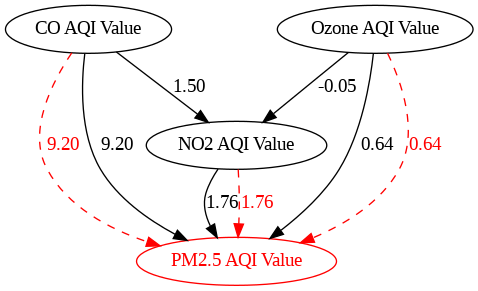

In [204]:
features = [i for i in range(df1.drop(["PM2.5 AQI Value"], axis=1).shape[1])]
print("features: ", features)

dot = make_dot(
    model.adjacency_matrix_,
    labels=df1.columns.to_list(),
    prediction_feature_indices=features,
    prediction_target_label='PM2.5 AQI Value',
    prediction_coefs=reg.coef_
    )

dot.format = 'png'
dot.render('dag')

Image("dag.png")

## Interpretation of Causal Relationships between Pollutants in AQI Variables

- **Nodes:** The nodes (CO AQI Value, NO2 AQI Value, Ozone AQI Value, and PM2.5 AQI Value) represent different pollutants.

- **Directed Edges:** The directed edges (arrows) suggest a predictive relationship from one pollutant to another.

- **Strength of Relationships:** The numbers on the arrows indicate the strength of the relationship; for instance, CO AQI Value has a strong positive influence on NO2 AQI Value (9.24), suggesting that as CO increases, NO2 tends to increase significantly.

- **Target Node:** PM2.5 AQI Value is the target node, and other nodes are pointing towards it, suggesting they are predictors for PM2.5 levels. NO2 has a particularly strong positive influence (1.76).

- **Influence of Ozone on PM2.5:** Ozone shows a slight negative influence on PM2.5 (-0.05), suggesting a higher ozone level might slightly decrease PM2.5, which is an unconventional finding as higher ozone often correlates with higher overall pollution, but it might be accurate in specific atmospheric conditions.

- **Focal Point: PM2.5:** The graph highlights PM2.5 as a focal point, indicating it might be significantly influenced by other pollutants measured in AQI, with NO2 being a major contributor.


# **Conclusion**

The causality within this project was primarily explored through the analysis of the relationships between various air pollutants and their impact on air quality. The elements that contributed to establishing causality include:

- **Data on Key Pollutants**: The study focused on pollutants known to affect air quality, including carbon monoxide (CO), nitrogen dioxide (NO2), ozone (O3), and particulate matter (PM2.5). These pollutants are emitted from various sources such as industrial activities, vehicle emissions, agricultural activities, and natural events like wildfires and dust storms.

- **Statistical and Machine Learning Techniques**: Techniques such as correlation analysis and linear regression were utilized to identify patterns and relationships between the pollutants and air quality indices (AQIs). These methods helped to determine whether increases in specific pollutants were associated with worsening air quality.

- **Causal Inference Models (LiNGAM)**: The use of causal inference models like LiNGAM was crucial in moving beyond correlation to establish causality. LiNGAM helped to uncover the directed relationships among the pollutants, indicating which pollutants were likely causing deteriorations in air quality rather than just being associated with them.

- **Directed Acyclic Graphs (DAGs)**: DAGs provided a visual representation of the causal relationships inferred from the data, showcasing how various pollutants influenced each other and the overall air quality. For example, the DAGs suggested that CO levels had a strong causal influence on NO2 levels, and NO2 levels, in turn, had a significant impact on PM2.5 AQI values.

- **Experimental Knowledge and Prior Studies**: The integration of knowledge from previous research and environmental science principles (e.g., the formation of ozone from NO2 under sunlight) supported the interpretation of causal relationships. This background knowledge helped to validate the causality inferred from the data and models.

- **Incorporation of Prior Knowledge**: The application of prior knowledge in causal modeling (e.g., known pathways from CO to NO2) enabled the models to incorporate domain-specific insights, thereby refining the causality analysis and making the findings more reliable.

Through these elements, the project was able to establish causality between specific air pollutants and air quality, guiding the identification of key pollutants for targeted mitigation efforts. This causality analysis is fundamental for informing policy decisions, developing strategies for reducing emissions, and ultimately improving air quality and public health outcomes.


# References

- Chatgpt
- Bard
- Medium Article https://medium.com/@xwang222/causal-inference-101-ep02-directed-acyclic-graph-dag-c0d02ce2f7bb
- https://www.kaggle.com/code/akashgopalgs/eda-on-global-air-pollution
- https://www.sciencedirect.com/topics/social-sciences/causal-inference
- https://github.com/KJMAN678/casual_reasoning_lignum/blob/master/LIGNAM.ipynb
- https://www.kaggle.com/code/sasakitetsuya/what-causes-pm2-5

MIT License

Copyright (c) 2024 Selvin Tuscano

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

